# k-means clustering

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [98]:
df=pd.read_csv('Iris.csv')
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [100]:
df = df.drop(columns=["Unnamed: 0"])

In [101]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot to Identify Outliers')

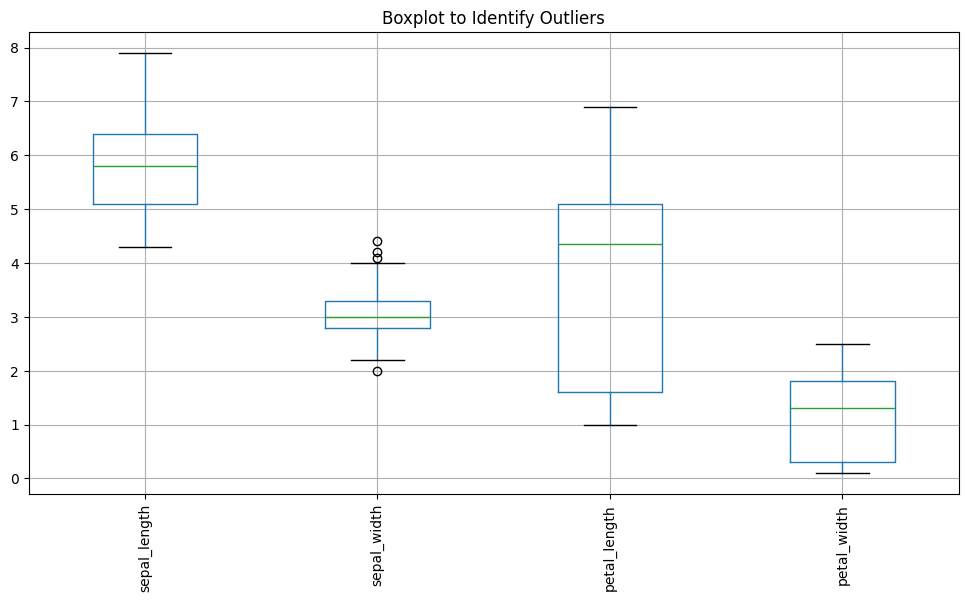

In [102]:
# Create boxplots for all numerical columns to check outliers
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=90)  
plt.title("Boxplot to Identify Outliers")

In [103]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [104]:
df["species"] = df["species"].map({"setosa": 1, "versicolor": 2, "virginica": 0})
df["species"].unique()

array([1, 2, 0])

In [105]:
# remove outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# interquatile range formula

IQR = Q3 - Q1
# formula of upper and lower outliers 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace moderate values with upper/lower bounds instead of removing rows
df_clean = df.copy()
for  i in df_clean[["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]]:
    df_clean[i] = np.where( df_clean[i] < lower_bound[i] , lower_bound[i] , df_clean[i])
    df_clean[i] = np.where( df_clean[i] > upper_bound[i], upper_bound[i] , df_clean[i] )


Text(0.5, 1.0, 'Boxplot After removing Outliers')

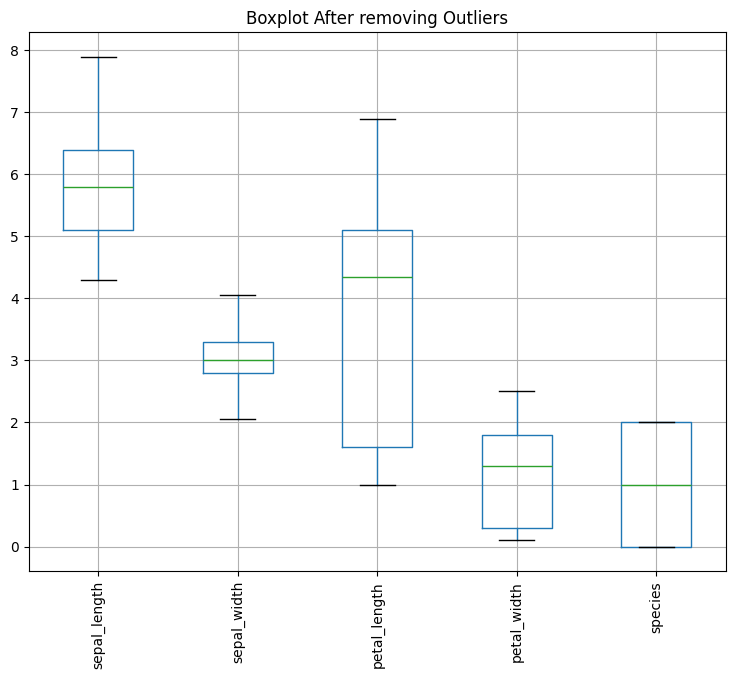

In [106]:
# Check outlires 

plt.figure(figsize=(9,7))
df_clean.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot After removing Outliers")

In [107]:
df_clean["species"] = df_clean["species"].map({1: "setosa", 2: "versicolor", 0 : "virginica"})
df_clean["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [108]:
# Select features for clustering
x = df_clean[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [109]:
# Normalize features
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [110]:

inertia = []
for i in range(1 , 10):
    model = KMeans(n_clusters=i , random_state=42)
    model.fit(x_scaled)
    inertia.append(model.inertia_)

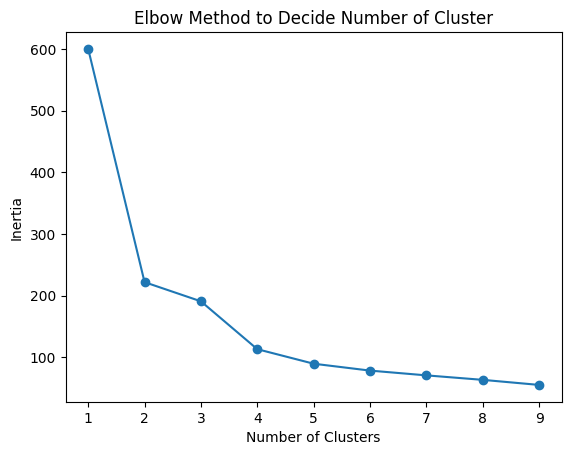

In [111]:
plt.plot(range (1, 10),inertia, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Decide Number of Cluster")
plt.show()

In [112]:

# Apply K-Means clustering
model = KMeans(n_clusters=3, random_state=42)
model.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [113]:
df_clean["Cluster"] = model.labels_

In [114]:
df_clean.groupby("Cluster")["species"].value_counts()

Cluster  species   
0        virginica     50
         versicolor    46
1        setosa        33
2        setosa        17
         versicolor     4
Name: count, dtype: int64

In [115]:
df_clean["Cluster"].unique()

array([1, 2, 0], dtype=int32)

In [116]:
df_clean["Cluster"] = df_clean["Cluster"].map({1: "setosa" , 2: "versicolor" , 0 : "virginica"})

In [117]:
df_clean.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,versicolor
2,4.7,3.2,1.3,0.2,setosa,versicolor
3,4.6,3.1,1.5,0.2,setosa,versicolor
4,5.0,3.6,1.4,0.2,setosa,setosa


Explained Variance Ratio: [0.72959926 0.22833935]


Text(0, 0.5, 'Principle Component 2')

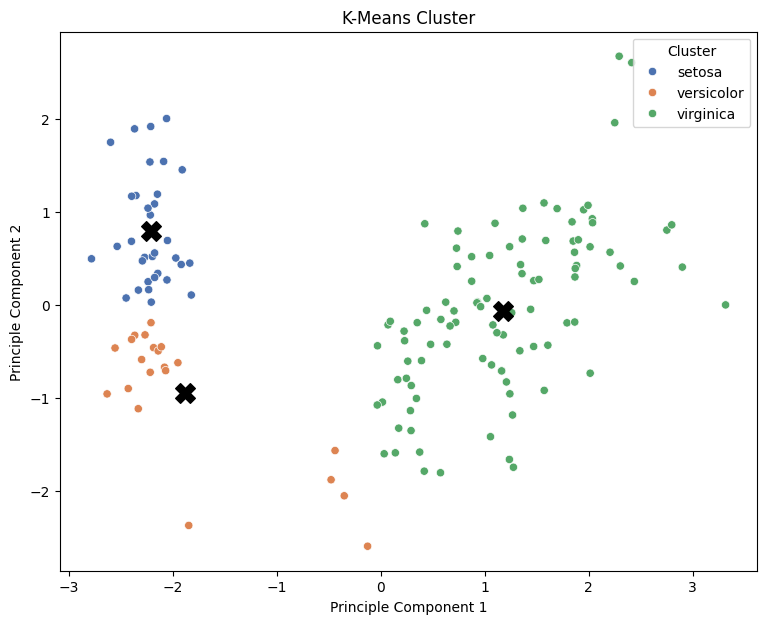

In [118]:
# Apply PCAto deduce feature to 2D

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

#  Check explained variance ratio 
print("Explained Variance Ratio:", pca.explained_variance_ratio_) 

# Add PCA component to the dataframe 
df_clean["PCA1"] = x_pca[: , 0]
df_clean["PCA2"] = x_pca[: , 1]

# visuallize the cluster
plt.figure(figsize=(9,7))
sns.scatterplot( data=df_clean ,x= "PCA1" , y= "PCA2" ,hue="Cluster" , palette="deep")
centers = pca.transform(model.cluster_centers_)
plt.scatter(centers[: , 0] , centers[: , 1 ] , c="black" , s=200 ,  marker="X")
plt.title("K-Means Cluster")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")